In [59]:
#who did most of the transactions
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#create a new instance of the bigquery client
from google.cloud import bigquery

client = bigquery.Client()

#assign a variable to the query called query

query = """
SELECT inputs.input_pubkey_base58 AS input_key, version , count(*) as count
FROM `bigquery-public-data.bitcoin_blockchain.transactions`
    JOIN UNNEST (inputs) AS inputs
WHERE inputs.input_pubkey_base58 IS NOT NULL AND version IS NOT NULL
GROUP BY inputs.input_pubkey_base58, version order by count(*) desc limit 100
"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
input_count = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
input_count.head(10)

,input_key,version,count
0,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,2,1059920
1,1dice8EMZmqKvrGE4Qc9bUFf9PX3xaYDp,1,810814
2,1dice8EMZmqKvrGE4Qc9bUFf9PX3xaYDp,2,788204
3,1dice97ECuByXAvqXpaYzSaQuPVvrtmz6,2,730050
4,1LuckyR1fFHEsXYyx5QK4UFzv3PEAepPMK,2,691581
5,1P9RQEr2XeE3PEb44ZE35sfZRRW1JHU8qx,536870912,663823
6,1J37CY8hcdUXQ1KfBhMCsUVafa8XjDsdCn,536870912,632291
7,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,3,535545
8,1DUb2YYbQA1jjaNYzVXLZ7ZioEhLXtbUru,536870912,455031
9,1LAnF8h3qMGx3TSwNUHVneBZUEpwE4gu3D,536870912,415145


In [77]:
#the correlation between version and count
input_count.corr(method='pearson')

,version,count
version,1.000000,-0.040172
count,-0.040172,1.000000


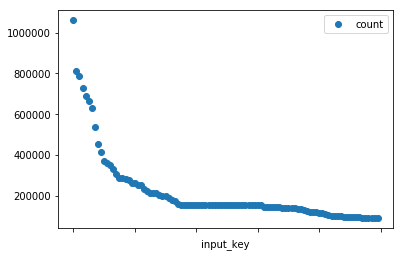

In [76]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
input_count.plot(x='input_key', y='count', style='o')

In [61]:
#In the first ten days of the Bitcoin Blockchain, only one transaction was recorded on January 16th, 2009
query = """
SELECT
  o.day,
  COUNT(DISTINCT(o.output_key)) AS recipients
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,
          86400000))) AS day,
    output.output_pubkey_base58 AS output_key
  FROM
    `bigquery-public-data.bitcoin_blockchain.transactions`,
    UNNEST(outputs) AS output ) AS o
GROUP BY
  day
ORDER BY
  day
"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
rec = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
rec.head(10)

,day,recipients
0,2009-01-09 00:00:00+00:00,0
1,2009-01-10 00:00:00+00:00,0
2,2009-01-11 00:00:00+00:00,0
3,2009-01-12 00:00:00+00:00,0
4,2009-01-13 00:00:00+00:00,0
5,2009-01-14 00:00:00+00:00,0
6,2009-01-15 00:00:00+00:00,0
7,2009-01-16 00:00:00+00:00,1
8,2009-01-17 00:00:00+00:00,0
9,2009-01-18 00:00:00+00:00,0


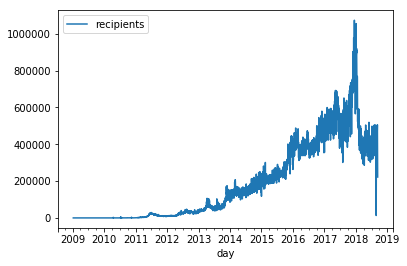

In [62]:
#the number of daily recipients has grown dramatically
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
rec.plot(x='day', y='recipients')

In [75]:
rec.corr(method='pearson')

,recipients
recipients,1.0
